# Tests

Purpose:
- High dimensional example of structure spectrum fit

In [2]:
import numpy as np
import pylab as plt
import swyft
import torch
%load_ext autoreload
%autoreload 2
swyft.set_verbosity(5)

import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


In [3]:
DEVICE = 'cuda:0'

In [14]:
zdim = 100Sometimes correlations are 
param_names = ["z"+str(i) for i in range(zdim)]

### Test 1 - Small signal, huge noise, large data, more training data

/home/weniger/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/home/weniger/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in true_divide
  


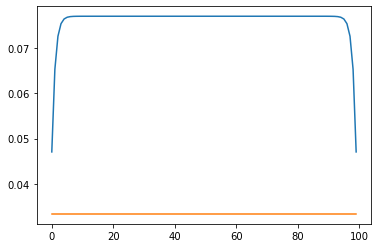

In [59]:
g = np.linspace(-0.2, 1.2, 1000)
T = np.array([np.exp(-(g-i/zdim)**2/0.01**2) for i in range(zdim)]).T
sigma = 0.1
F = T.T.dot(T)/sigma**2
#plt.imshow(F)
Sigma = np.linalg.inv(F)
errors0 = np.diag(Sigma)**0.5
errors1 = np.diag(1/F)**0.5
C = np.diag(1/errors0).dot(Sigma.dot(np.diag(1/errors0)))

#plt.imshow(C)
#plt.colorbar()
#print(errors0)
#print(errors0)
#print(errors0/errors1)
plt.plot(errors0)
plt.plot(errors1)

In [60]:
def model(params, sigma = sigma):
    z = np.array([params[key] for key in param_names])
    x = T.dot(z)
    return dict(x=x)

In [61]:
def noise(obs, params, sigma = sigma):
    x = obs['x']
    x = x + np.random.randn(*x.shape) * sigma
    return dict(x=x)

In [62]:
par0 = {k: 0.5 for k in param_names}
obs0 = model(par0)
obs1 = noise(obs0, par0)

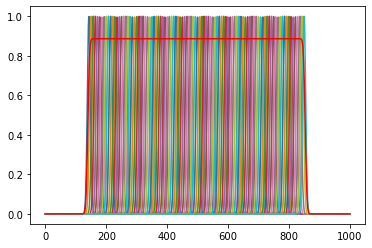

In [65]:
plt.plot(T);
plt.plot(obs0['x'], 'r')
#plt.plot(obs1['x'], 'r')

In [66]:
prior = swyft.Prior({k: ["uniform", 0., 1.] for k in param_names})

In [67]:
class Head(swyft.Module):
    def __init__(self, obs_shapes):
        super().__init__(obs_shapes=obs_shapes)
        self.n_features = 50
        self.onl_f = swyft.OnlineNormalizationLayer(torch.Size([10000]))
        self.l1 = torch.nn.Linear(10000, 50)
        
    def forward(self, obs):
        x=obs['x']
        x = self.onl_f(x)
        x = self.l1(x)
        return x

DEBUG:root:Registering new swyft.Module with tag `Head`


In [69]:
s = swyft.NestedRatios(model, prior, noise = noise, obs = obs0, device = DEVICE, Ninit = 10000)

In [70]:
s.run(max_rounds=1, train_args = dict(lr_schedule = [1e-3, 1e-4]))

DEBUG:root:Creating new empty MemoryCache.
DEBUG:root:Creating Cache.
DEBUG:root:  params = ['z0', 'z1', 'z2', 'z3', 'z4', 'z5', 'z6', 'z7', 'z8', 'z9', 'z10', 'z11', 'z12', 'z13', 'z14', 'z15', 'z16', 'z17', 'z18', 'z19', 'z20', 'z21', 'z22', 'z23', 'z24', 'z25', 'z26', 'z27', 'z28', 'z29', 'z30', 'z31', 'z32', 'z33', 'z34', 'z35', 'z36', 'z37', 'z38', 'z39', 'z40', 'z41', 'z42', 'z43', 'z44', 'z45', 'z46', 'z47', 'z48', 'z49', 'z50', 'z51', 'z52', 'z53', 'z54', 'z55', 'z56', 'z57', 'z58', 'z59', 'z60', 'z61', 'z62', 'z63', 'z64', 'z65', 'z66', 'z67', 'z68', 'z69', 'z70', 'z71', 'z72', 'z73', 'z74', 'z75', 'z76', 'z77', 'z78', 'z79', 'z80', 'z81', 'z82', 'z83', 'z84', 'z85', 'z86', 'z87', 'z88', 'z89', 'z90', 'z91', 'z92', 'z93', 'z94', 'z95', 'z96', 'z97', 'z98', 'z99']
DEBUG:root:  obs_shapes = {'x': (1000,)}
INFO:root:NRE round: R = 1
INFO:root:Number of training samples is N_R = 10000


Creating new cache.


INFO:root:Additional simulations are required after growing the cache.
Simulate:   0%|          | 3/9946 [00:00<06:36, 25.08it/s]

  adding 9946 new samples to simulator cache.


Simulate: 100%|██████████| 9946/9946 [07:06<00:00, 23.33it/s]
INFO:root:Starting neural network training.
DEBUG:root:Initializing swyft.Module with tag `DefaultHead`
DEBUG:root:  args = `()`
DEBUG:root:  kwargs = `{'obs_shapes': {'x': torch.Size([1000])}, 'obs_transform': None, 'online_norm': True}`
DEBUG:root:Initializing swyft.Module with tag `DefaultTail`
DEBUG:root:  args = `(1000, [('z0',), ('z1',), ('z2',), ('z3',), ('z4',), ('z5',), ('z6',), ('z7',), ('z8',), ('z9',), ('z10',), ('z11',), ('z12',), ('z13',), ('z14',), ('z15',), ('z16',), ('z17',), ('z18',), ('z19',), ('z20',), ('z21',), ('z22',), ('z23',), ('z24',), ('z25',), ('z26',), ('z27',), ('z28',), ('z29',), ('z30',), ('z31',), ('z32',), ('z33',), ('z34',), ('z35',), ('z36',), ('z37',), ('z38',), ('z39',), ('z40',), ('z41',), ('z42',), ('z43',), ('z44',), ('z45',), ('z46',), ('z47',), ('z48',), ('z49',), ('z50',), ('z51',), ('z52',), ('z53',), ('z54',), ('z55',), ('z56',), ('z57',), ('z58',), ('z59',), ('z60',), ('z61',), 

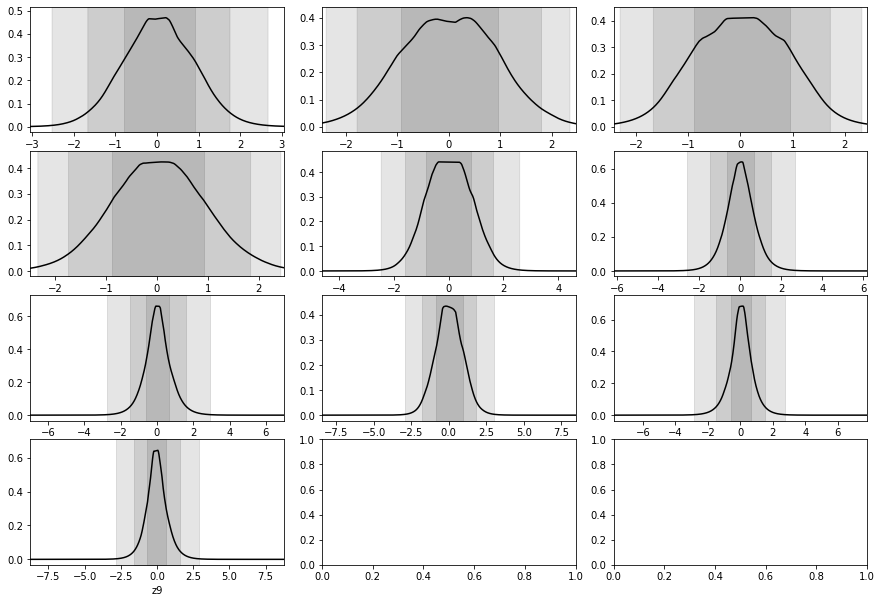

In [54]:
samples = s.marginals(obs0, 100000)
for i in range(zdim):
    samples['params']['z%i'%i] = (samples['params']['z%i'%i] - par0['z%i'%i])/errors0[i]
swyft.plot1d(samples, param_names, ncol = 3, grid_interpolate = True)